2023-03-29 11:44:08.684507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 11:44:14.326084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
900/900 [==============================] - 8s 9ms/step - loss: 1.9083 - accuracy: 0.3171 - val_loss: 1.7606 - val_accuracy: 0.3714
Epoch 2/100
900/900 [==============================] - 7s 8ms/step - loss: 1.7168 - accuracy: 0.3911 - val_loss: 1.6724 - val_accuracy: 0.4034
Epoch 3/100
900/900 [==============================] - 7s 8ms/step - loss: 1.6285 - accuracy: 0.4234 - val_loss: 1.6313 - val_accuracy: 0.4144
Epoch 4/100
900/900 [==============================] - 7s 8ms/step - loss: 1.5648 - accuracy: 0.4450 - val_loss: 1.5778 - val_accuracy: 0.4344
Epoch 5/100
900/900 [==============================] - 7s 8ms/step - loss: 1.5188 - accuracy: 0.4628 - val_loss: 1.5447 - val_accuracy: 0.4550
Epoch 6/100
900/900 [==============================] - 7s 8ms/step - loss: 1.4770 - accuracy: 0.4787 - val_loss: 1.4898 - val_accuracy: 0.4670
Epoch 7/100
900/900 [==============================] - 7s 8ms/step - loss: 1.4408 - accuracy: 0.4906 - val_loss: 1.4790 - val_accuracy: 0.4746

Epoch 58/100
900/900 [==============================] - 7s 8ms/step - loss: 0.3035 - accuracy: 0.8952 - val_loss: 2.0297 - val_accuracy: 0.5358
Epoch 59/100
900/900 [==============================] - 7s 8ms/step - loss: 0.2900 - accuracy: 0.9004 - val_loss: 2.0408 - val_accuracy: 0.5388
Epoch 60/100
900/900 [==============================] - 7s 8ms/step - loss: 0.2785 - accuracy: 0.9050 - val_loss: 2.0662 - val_accuracy: 0.5384
Epoch 61/100
900/900 [==============================] - 7s 8ms/step - loss: 0.2640 - accuracy: 0.9081 - val_loss: 2.0671 - val_accuracy: 0.5450
Epoch 62/100
900/900 [==============================] - 7s 8ms/step - loss: 0.2613 - accuracy: 0.9093 - val_loss: 2.0710 - val_accuracy: 0.5390
Epoch 63/100
900/900 [==============================] - 7s 8ms/step - loss: 0.2453 - accuracy: 0.9151 - val_loss: 2.1354 - val_accuracy: 0.5320
Epoch 64/100
900/900 [==============================] - 7s 8ms/step - loss: 0.2220 - accuracy: 0.9238 - val_loss: 2.1982 - val_accuracy:

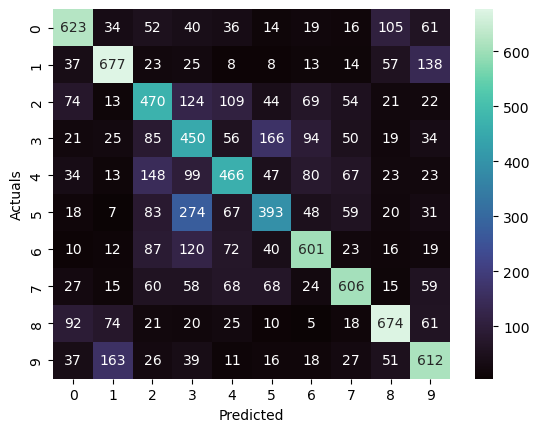

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

num_classes = 10

# Load dataset
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

train_x = train_x.astype('float32') # this is necessary for the division below
train_x /= 255

test_x = test_x.astype('float32') / 255
# test_y = np_utils.to_categorical(test_y, num_classes)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

img_rows = img_cols = 32
channels = 3

simple_model_smaller_batch = Sequential()
# input_shape=(img_rows*img_cols*channels,),
simple_model_smaller_batch.add(Flatten(input_shape=(img_rows, img_cols, channels)))
simple_model_smaller_batch.add(Dense(1024, activation='relu'))
simple_model_smaller_batch.add(Dense(512, activation='relu'))
simple_model_smaller_batch.add(Dense(256, activation='relu'))
simple_model_smaller_batch.add(Dense(128, activation='relu'))
simple_model_smaller_batch.add(Dense(10, activation='softmax'))

simple_model_smaller_batch.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# simple_model_smaller_batch_history = simple_model_smaller_batch.fit(train_x, train_y, batch_size=50, epochs=50, validation_data=(test_x, test_y))
simple_model_smaller_batch_history = simple_model_smaller_batch.fit(train_x, train_y, batch_size=50, epochs=100, validation_split=0.1)

# Make predictions on the test set
test_pred = simple_model_smaller_batch.predict(test_x)
test_pred = np.argmax(test_pred, axis=1)
test_y = np.argmax(test_y, axis=1)
cm1 = confusion_matrix(test_y, test_pred)
print(cm1)

# Now we evaluate the model using confusion matrix for this test dataset
sns.heatmap(cm1, annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')

# Get the accuracy score
test_accuracy = round(100 * accuracy_score(test_y, test_pred), 2)
print(test_accuracy)

labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']


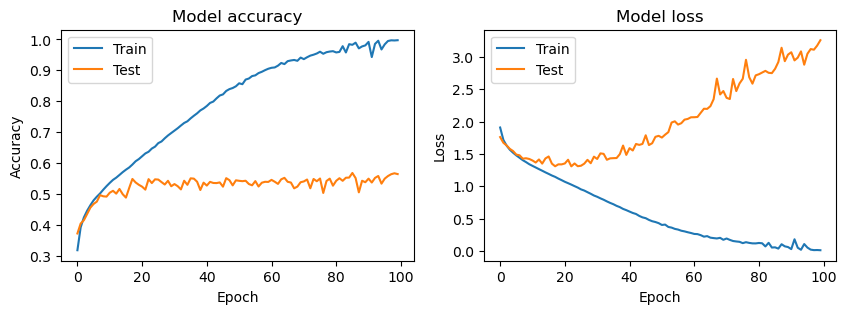

In [3]:
import matplotlib.pyplot as plt
def plot_history(history, title):
#     print(history.history)
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
plot_history(simple_model_smaller_batch_history, 'Simple NN with 100 batch size')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

num_classes = 10

# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

simple_model_smaller_batch = Sequential()
# input_shape=(img_rows*img_cols*channels,),
simple_model_smaller_batch.add(Flatten(input_shape=(28, 28)))
simple_model_smaller_batch.add(Dense(1024, activation='relu'))
simple_model_smaller_batch.add(Dense(512, activation='relu'))
simple_model_smaller_batch.add(Dense(256, activation='relu'))
simple_model_smaller_batch.add(Dense(128, activation='relu'))
simple_model_smaller_batch.add(Dense(10, activation='softmax'))

simple_model_smaller_batch.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# simple_model_smaller_batch_history = simple_model_smaller_batch.fit(train_x, train_y, batch_size=50, epochs=50, validation_data=(test_x, test_y))
simple_model_smaller_batch_history = simple_model_smaller_batch.fit(x_train, y_train, batch_size=50, epochs=100, validation_split=0.2)

# Make predictions on the test set
test_pred = simple_model_smaller_batch.predict(x_test)
test_pred = np.argmax(test_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm1 = confusion_matrix(y_test, test_pred)
print(cm1)

# Now we evaluate the model using confusion matrix for this test dataset
sns.heatmap(cm1, annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')

# Get the accuracy score
test_accuracy = round(100 * accuracy_score(y_test, test_pred), 2)
print(test_accuracy)

labels = ['Tees','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag', 'Ankle boots']